# Introduction

This is heavily adapted from a notebook by Simon Mudd, a geomorphologist and coding fan at the University of Edinburgh. The original notebook can be found on his teaching GitHub repo [here](https://github.com/simon-m-mudd/smm_teaching_notebooks/blob/master/Soil_production_and_weathering/The_soil_production_function.ipynb).

In fact, I am going to let Simon do the talking for this first part...

# Simon says

In geomorphology, we model soil production as it relates to the rate of weathering on a hillslope. We use an exponential function that depends on soil depth, with weathering rates declining as soil gets deeper (Heimsath et al., 1997):

$p = W_0 e^{-\frac{h}{\gamma}}$

where $W_0$ is the soil production rate with no soil, and $\gamma$ is a length scale that determines how quickly soil production falls off with depth.

Typical values for $W_0$ are in the range 0.01-1 mm/yr [(Perron, 2017)](http://www.annualreviews.org/doi/abs/10.1146/annurev-earth-060614-105405). Note that when you're doing numerical calculations you have to be consistent with units. We will always do calculations in length units of ***metres*** (m), time units of ***years*** (y) and mass units of ***kilograms*** (kg). However we might convert to other units for the purposes of plotting sensible numbers (e.g. Weathering rates in mm/y = m/y $\times$ 1000).

Let's take a look at what this function looks like by plotting it with python:

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# The variable h_locs, which you can think of as "h locations," is simply an array of numbers spanning from 0 to 2 with a spacing of 0.1 
# It represents the total soil thicknesses at which we are going to solve equations. 
# These are the inputs, or independent variables, or the "x values" for the function that we are going to solve. 

h_locs = np.arange(0,2,0.1)

We define the soil production function as, well, a function in Python. Learn more about defining functions [here](https://docs.python.org/3/tutorial/controlflow.html#defining-functions).

In [8]:
def soil_prod_function(h_locs, W_0 = 0.0001, gamma = 0.4):
    P = np.multiply(W_0,  np.exp( - np.divide(h_locs,gamma)  )  )
    return P

Now lets plot the function and see what it looks like.

In the code below there are two soil production functions that you can compare. For example if you make `W_0` twice as much as `W_02` that means the second soil production function produces soil twice as fast as the first when there is no soil. 

<Figure size 1000x400 with 0 Axes>

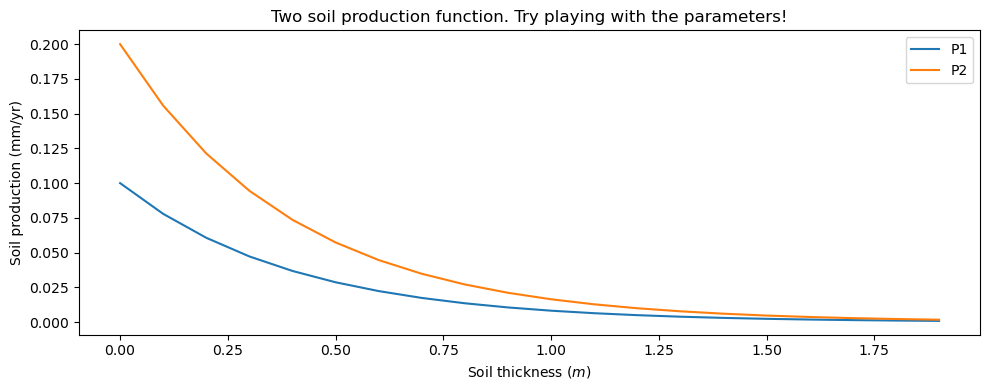

In [9]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.clf()

# TRY CHANGING THE FOUR PARAMETER BELOW
# These two are for the first soil production function
W_0 = 0.0001
gamma = 0.4

# These two are for the second soil production function
W_02 = 0.0002
gamma2 = 0.4

# This bit calculates the functions
P = soil_prod_function(h_locs, W_0 = W_0, gamma = gamma)
P2 = soil_prod_function(h_locs, W_0 = W_02, gamma = gamma2)

# The rest of this stuff makes the figure
f, ax = plt.subplots(1, 1)
ax.plot(h_locs, P*1000,label="P1")
ax.plot(h_locs, P2*1000,label="P2")
ax.set_xlabel("Soil thickness ($m$)")
ax.set_ylabel("Soil production (mm/yr)")
plt.title("Two soil production function. Try playing with the parameters!")
ax.legend()
plt.tight_layout()

# Numerically producing soil

The soil production function has *slower* soil production with thicker soil, meaning soil can't keep getting thicker forever! 

Describe in words how you might go about using these relationships presented in this notebook to calculate how long it would take a bare soil to reach a thickness at which the production of new soil is negigible. 

Go step by step, writing in words or pseudo-code the algorithmic steps you would take.

1. ...
2. ...
3. ...

So, given your parameters, <b>how long would it take to go from zero soil to a constant soil thickness?</b>

Now, remembering the bucket example from the mini-assigment, implement a code that:
1. Starts with a soil thickness of 0 at time 0
2. Produces soil at each time step 
3. Stops when you have reached a "steady-state" (negigible soil is being produced from one time step to the next).

Consider using [conditional and compound statements](https://docs.python.org/3/reference/compound_stmts.html) to test if certain conditions are met in a [loop](https://wiki.python.org/moin/ForLoop). 

In [5]:
# Your code here

# Deliverables

1. Completed `iterating.ipynb`
2. Completed `producing_soil.ipynb`, specifically numerically implementing the soil production function to determine the number of years needed to produce a soil whose thickness does not appreciably change with time.

!* <b>BONUS</b> *! For an extra half point, compare your numerical solution of years until steady state with an <i>analytic</i> solution using the same parameters. Use integration!